About Dataset
Twitter Sentiment Analysis Dataset
Overview
This is an entity-level sentiment analysis dataset of twitter. Given a message and an entity, the task is to judge the sentiment of the message about the entity. There are three classes in this dataset: Positive, Negative and Neutral. We regard messages that are not relevant to the entity (i.e. Irrelevant) as Neutral.

Usage
Please use twitter_training.csv as the training set and twitter_validation.csv as the validation set. Top 1 classification accuracy is used as the metric.

The goal of this project is to know the 
1. sentiment distribution
2. sentiment scores
3. trend analysis
4. opinion mining
5. visualization

In [14]:
import pandas as pd
import numpy as np 
import re 
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import spacy

from sklearn.model_selection import train_test_split #Data testing
from sklearn.linear_model import LogisticRegression #Prediction Model
from sklearn.metrics import accuracy_score #Comparison between real and predicted
from sklearn import metrics
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.linear_model import RidgeClassifier,SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
import string
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marcostephanus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
train = pd.read_csv("twitter_training.csv")
val = pd.read_csv("twitter_validation.csv")

In [6]:
train.columns=['Tweet_id','information','type','Tweet_content']
train.head(5)

,Tweet_id,information,type,Tweet_content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
val.columns=['Tweet_id','information','type','Tweet_content']
val.head(5)

,Tweet_id,information,type,Tweet_content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [8]:
# Check for missing values in the training dataset
print("Missing Values - Training Dataset:")
print(train.isnull().sum())

# Check for missing values in the validation dataset
print("Missing Values - Validation Dataset:")
print(val.isnull().sum())

# Remove duplicate values in the training dataset
train.drop_duplicates(inplace=True)

# Remove duplicate values in the validation dataset
val.drop_duplicates(inplace=True)

# Confirm the removal of duplicates
print("Duplicates Removed - Training Dataset:")
print(train.duplicated().sum())

print("Duplicates Removed - Validation Dataset:")
print(val.duplicated().sum())

Missing Values - Training Dataset:
Tweet_id           0
information        0
type               0
Tweet_content    686
dtype: int64
Missing Values - Validation Dataset:
Tweet_id         0
information      0
type             0
Tweet_content    0
dtype: int64
Duplicates Removed - Training Dataset:
0
Duplicates Removed - Validation Dataset:
0


In [9]:
# Count the number of negative and positive comments
train_sentiment_counts = train['type'].value_counts()

In [10]:
# Count the number of negative and positive comments
val_sentiment_counts = val['type'].value_counts()

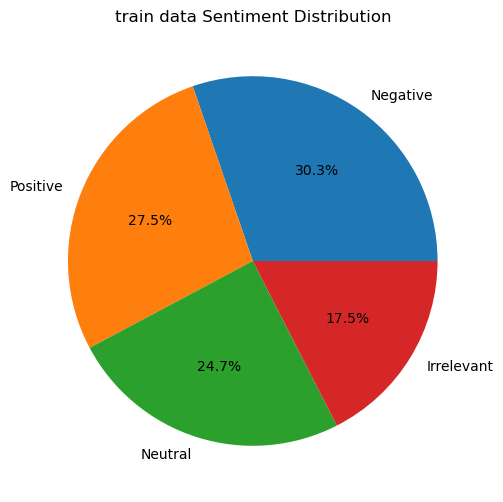

In [19]:
# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(train_sentiment_counts, labels=train_sentiment_counts.index, autopct='%1.1f%%')
plt.title('train data Sentiment Distribution')
plt.show()

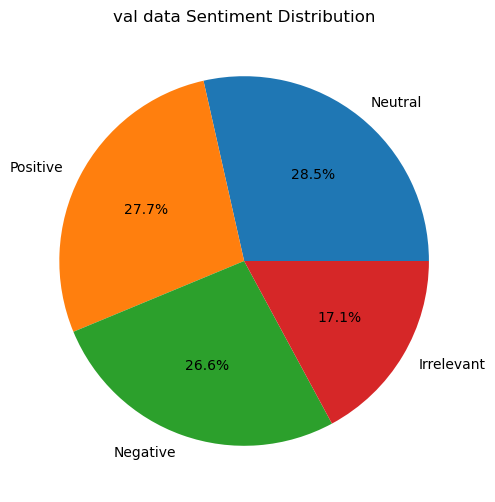

In [20]:
# Create a pie chart to visualize the sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(val_sentiment_counts, labels=val_sentiment_counts.index, autopct='%1.1f%%')
plt.title('val data Sentiment Distribution')
plt.show()

In [22]:
# Start with one review:
text = df.description[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'df' is not defined